In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from functools import partial


%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_y = np.append(X, y.reshape(150,1), axis=1)

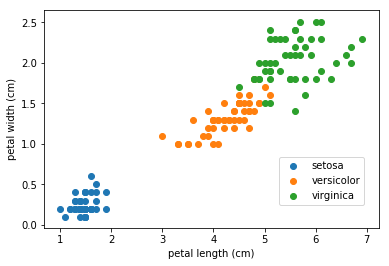

In [3]:
def plot_scatter():
    for i in range(y.max()+1):
        plt.scatter(X_y[X_y[:,4] == i][:,2],X_y[X_y[:,4] == i][:,3], label=iris.target_names[i])
    plt.legend(numpoints=1,bbox_to_anchor=(0.97,0.35))
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
plot_scatter()

## Contour Density Plot

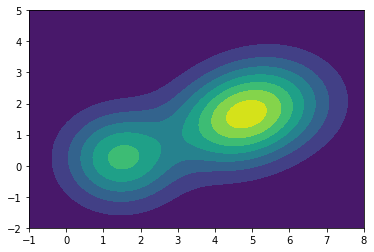

In [4]:
def plot_contour():
    x = np.linspace(-1, 8, 100)
    y = np.linspace(-2, 5, 100)
    xx, yy = np.meshgrid(x, y)
    sum_z=np.zeros([100,100])
    for i in range(3):
        zz = np.hstack((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)))
        a = KernelDensity().fit(X_y[X_y[:,4] == i][:,2:4])
        z = np.exp(a.score_samples(zz)).reshape(100,100)
        sum_z = np.add(sum_z, z)
        plt.contourf(xx,yy,sum_z)
plot_contour()

## Train and validation

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X[:,2:4], y, test_size=0.33)

In [6]:
pdf = []
for i in np.unique(y):
    pdf.append(KernelDensity().fit(X_train[y_train==i]))

def predict(X):    
    def score(pdf, X):
        return pdf.score(X.reshape(1,-1))    

    result = []
    for i in range(len(pdf)):
        sc = partial(score,pdf[i])
        result.append(np.exp(np.apply_along_axis(sc, 1, X)))
        
    result = np.array(result).T

    return np.argmax(result, axis=1)


    

In [7]:
y_pred = predict(X_test)

In [8]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.92      0.96      0.94        25
  virginica       0.91      0.83      0.87        12

avg / total       0.94      0.94      0.94        50



In [9]:
x = np.linspace(0,10,100)
y = np.linspace(0,4,100)

xx, yy = np.meshgrid(x, y)
Z = predict(np.c_[xx.ravel(), yy.ravel()]).reshape(100,100)

[]

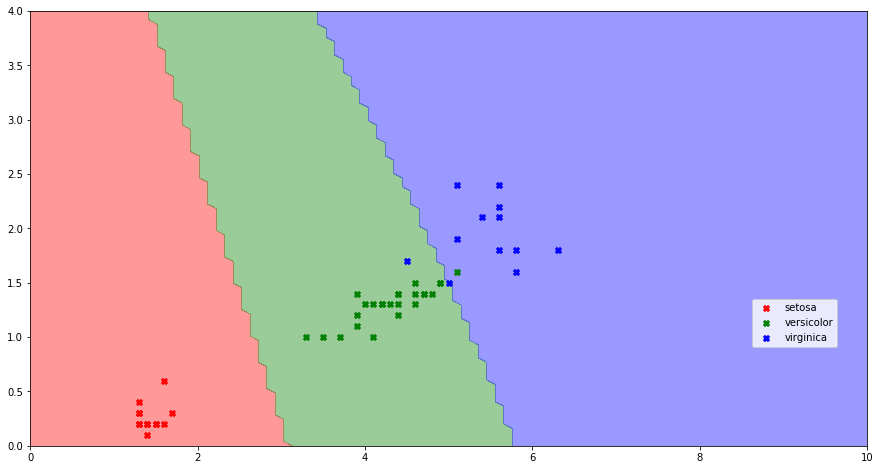

In [17]:
plt.figure(figsize=(15,8))

plt.contourf(xx,yy,Z, colors=('blue', 'red','green'), alpha=0.4, levels=[-2,-1,0,1, 2])
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], alpha=1, c='r', label=iris.target_names[0], marker='X')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], alpha=1, c='g', label=iris.target_names[1], marker='X')
plt.scatter(X_test[y_test==2][:,0], X_test[y_test==2][:,1], alpha=1, c='b', label=iris.target_names[2], marker='X')
plt.legend(numpoints=1,bbox_to_anchor=(0.97,0.35))


plt.plot()